# Example script for EFTCAMB

Showcasing some of the features of the code and its python interface

In [28]:
###############################################################################
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate
import copy

# ipython magic:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
###############################################################################
# import EFTCAMB:
here = './'
camb_path = os.path.realpath(os.path.join(os.getcwd(),here))
sys.path.insert(0, camb_path)
import camb
camb.set_feedback_level(10)
from camb import model, initialpower
from camb.baseconfig import CAMBError
print('EFTCAMB path:', camb.__path__)

EFTCAMB path: ['/Users/marco/Desktop/DES/Y6_extensions/1_EFTCAMB/camb']


In [5]:
###############################################################################
# run CAMB in GR mode for reference:

# set parameters:
pars_LCDM = camb.set_params(As=2.12605e-9,
                            ns=0.96,
                            H0=67.,
                            ombh2=0.022445,
                            omch2=0.120557,
                            mnu=0.06,
                            tau=0.079)
pars_LCDM.NonLinear = camb.model.NonLinear_none
# compute the spectra:
results_LCDM = camb.get_results(pars_LCDM)
# get the CMB TT power spectrum:
LCDM_TT_spectrum = copy.deepcopy(results_LCDM.get_cmb_power_spectra(pars_LCDM, CMB_unit='muK')['total'][:,0])
LCDM_ell = np.arange(LCDM_TT_spectrum.shape[0])

Reion redshift       =  10.035
Integrated opt depth =  0.0790
H0                   = 67.000000
Om_b h^2             =  0.022445
Om_c h^2             =  0.120557
Om_nu h^2            =  0.000645
Om_darkenergy        =  0.679921
Om_K                 =  0.000000
Om_m (inc Om_u)      =  0.319998
100 theta (CosmoMC)  =  1.040250
N_eff (total)        =  3.046000
 1 nu, g= 1.0153 m_nu*c^2/k_B/T_nu0=    356.53 (m_nu=  0.060 eV)
Reion opt depth      =  0.0790
Age of universe/GYr  =  13.812
zstar                =  1089.87
r_s(zstar)/Mpc       =  144.23
100*theta            =  1.040444
DA(zstar)/Gpc        =  13.86270
zdrag                =  1060.15
r_s(zdrag)/Mpc       =  146.86
k_D(zstar) Mpc       =  0.1412
100*theta_D          =  0.160537
z_EQ (if v_nu=1)     =  3417.31
k_EQ Mpc (if v_nu=1) =  0.010430
100*theta_EQ         =  0.810300
100*theta_rs_EQ      =  0.447763
tau_recomb/Mpc       =  280.33  tau_now/Mpc =  14142.9
Reion redshift       =  10.035
Integrated opt depth =  0.0790
H0        

In [6]:
###############################################################################
# run EFTCAMB for a given model:

eftcamb_params = {'EFTflag':1,
                  'PureEFTmodel':1,
                  'PureEFTmodelOmega':1,
                  'EFTOmega0':1.0,
                  'feedback_level':10}

pars_EFT = camb.set_params(As=2.12605e-9,
                           ns=0.96,
                           H0=67.,
                           ombh2=0.022445,
                           omch2=0.120557,
                           mnu=0.06,
                           tau=0.079,
                           **eftcamb_params)
pars_EFT.NonLinear = camb.model.NonLinear_none
# compute results:
results_EFT = camb.get_results(pars_EFT)
# get the power spectrum:
EFT_TT_spectrum = copy.deepcopy(results_EFT.get_cmb_power_spectra(pars_EFT, CMB_unit='muK')['total'][:,0])
EFT_ell = np.arange(EFT_TT_spectrum.shape[0])

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan23
  
***************************************************************

 EFTCAMB feedback level  = 10

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  T

 EFTCAMB model flags:
   EFTflag             =  1
   PureEFTmodel        =  1

   Model               =  Standard Pure EFT
   Number of params    =  1

   PureEFTmodelOmega   =  1

 Constant function: EFTOmega
   EFTOmega0           =    1.000000

***************************************************************
 EFTCAMB Return to GR time:        0.1000E-01
 EFTCAMB Return to GR threshold:   0.1000E-07
 Wa

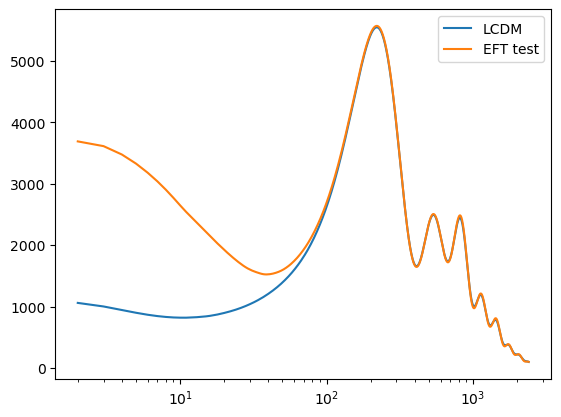

In [7]:
# compare some results with LCDM:

plt.plot(LCDM_ell[2:], LCDM_TT_spectrum[2:], label='LCDM')
plt.plot(EFT_ell[2:], EFT_TT_spectrum[2:], label='EFT test')
plt.xscale('log')
plt.legend();

***********************************************************************


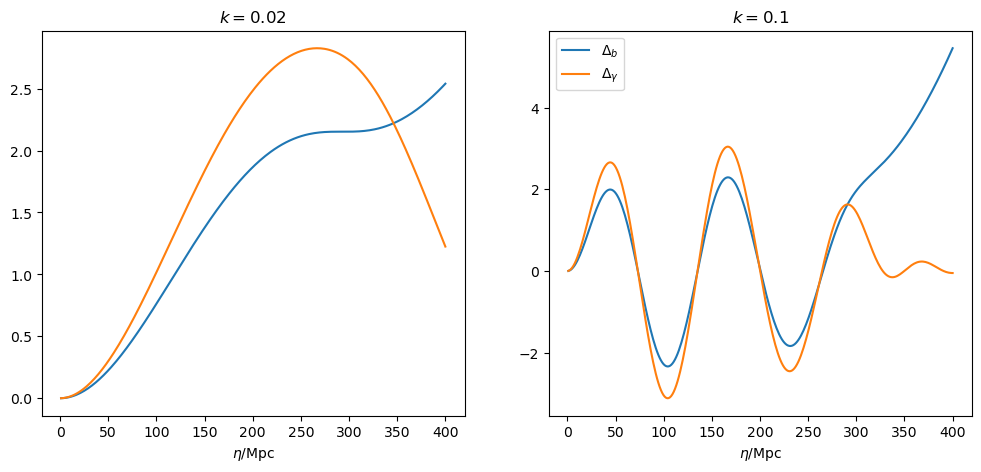

In [8]:
# make a plot of standard perturbations trough CAMB interface:
print('***********************************************************************')
eta = np.linspace(1, 400, 300)
ks = [0.02,0.1]
ev = results_EFT.get_time_evolution(ks, eta, ['delta_baryon','delta_photon'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 1])
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_b$', r'$\Delta_\gamma$'], loc = 'upper left')

***********************************************************************
['a', 'tau', 'k', 'grhoa2', 'grhom_t', 'gpresm_t', 'gpresdotm_t', 'gpresdotdotm_t', 'grhob_t', 'grhoc_t', 'grhor_t', 'grhog_t', 'grhov_t', 'gpiv_t', 'grhonu_tot', 'gpinu_tot', 'grhonudot_tot', 'gpinudot_tot', 'gpinudotdot_tot', 'adotoa', 'Hdot', 'Hdotdot', 'Hdotdotdot', 'EFTOmegaV', 'EFTOmegaP', 'EFTOmegaPP', 'EFTOmegaPPP', 'EFTOmegaPPPP', 'EFTc', 'EFTcdot', 'EFTcdotdot', 'EFTLambda', 'EFTLambdadot', 'EFTLambdadotdot', 'EFTGamma1V', 'EFTGamma1P', 'EFTGamma1PP', 'EFTGamma2V', 'EFTGamma2P', 'EFTGamma2PP', 'EFTGamma2PPP', 'EFTGamma3V', 'EFTGamma3P', 'EFTGamma3PP', 'EFTGamma3PPP', 'EFTGamma3PPPP', 'EFTGamma4V', 'EFTGamma4P', 'EFTGamma4PP', 'EFTGamma5V', 'EFTGamma5P', 'EFTGamma6V', 'EFTGamma6P', 'grhoq', 'gpresq', 'grhodotq', 'gpresdotq', 'EFTeomF', 'EFTeomN', 'EFTeomNdot', 'EFTeomX', 'EFTeomXdot', 'EFTeomY', 'EFTeomG', 'EFTeomU', 'EFTeomL', 'EFTeomM', 'EFTeomV', 'EFTeomVdot', 'EFTeomQ', 'EFTpiA1', 'EFTpiA2', 'EFTpiB1',

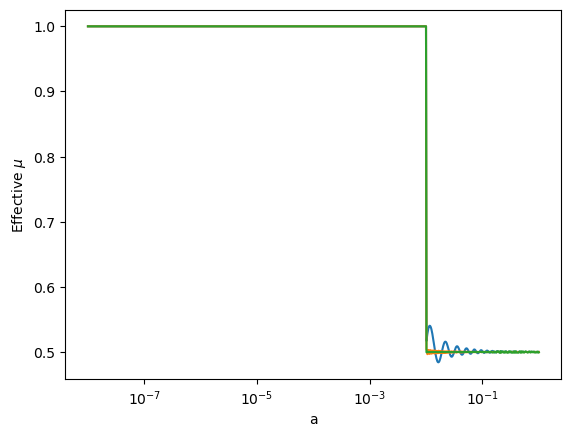

In [11]:
# test EFTCAMB a bit (effective definition of mu as a function of time for a couple of scales):
print('***********************************************************************')
a = np.logspace(-8,0,1000)
vars, val = pars_EFT.EFTCAMB.get_scale_evolution(results_EFT, [0.01,0.1,1.0], a)

# the function get_scale_evolution computes the folllowing quantities, at all given times and scales:
print(vars)

# we plot one:
plt.plot( val[0,:]['a'], np.abs(val[0,:]['mu']) )
plt.plot( val[1,:]['a'], np.abs(val[1,:]['mu']) )
plt.plot( val[2,:]['a'], np.abs(val[2,:]['mu']) )
plt.xlabel('a')
plt.ylabel('Effective $\mu$')
plt.xscale('log')

Reion opt depth      =  0.0790
Age of universe/GYr  =  13.812
zstar                =  1089.87
r_s(zstar)/Mpc       =  144.23
100*theta            =  1.040444
DA(zstar)/Gpc        =  13.86270
zdrag                =  1060.15
r_s(zdrag)/Mpc       =  146.86
k_D(zstar) Mpc       =  0.1412
100*theta_D          =  0.160537
z_EQ (if v_nu=1)     =  3417.31
k_EQ Mpc (if v_nu=1) =  0.010430
100*theta_EQ         =  0.810300
100*theta_rs_EQ      =  0.447763


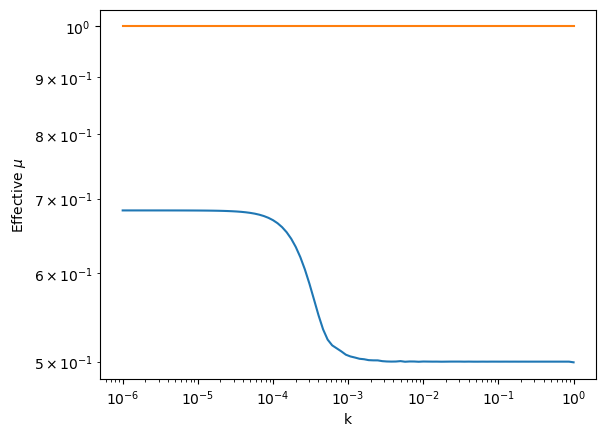

In [12]:
# test EFTCAMB a bit (effective definition of mu as a function of scale):
k = np.logspace(-6,0,100)
a = np.array([1.0])

vars, val = pars_EFT.EFTCAMB.get_scale_evolution(results_EFT, k, a)
vars_ref, val_ref = pars_LCDM.EFTCAMB.get_scale_evolution(results_LCDM, k, a)

plt.plot( val[:, 0]['k'], np.abs(val[:, 0]['mu']) )
plt.plot( val_ref[:, 0]['k'], np.abs(val_ref[:, 0]['mu']) )
plt.xlabel('k')
plt.ylabel('Effective $\mu$')
plt.xscale('log')
plt.yscale('log')

In [13]:
# print EFTCAMB header
pars_EFT.EFTCAMB.feedback()

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan23
  
***************************************************************

 EFTCAMB feedback level  = 10

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  T

 EFTCAMB model flags:
   EFTflag             =  1
   PureEFTmodel        =  1

   Model               =  Standard Pure EFT
   Number of params    =  1

   PureEFTmodelOmega   =  1

 Constant function: EFTOmega
   EFTOmega0           =    1.000000



In [14]:
# how many extra parameters we have:
pars_EFT.EFTCAMB.num_params()

1

In [15]:
# how they are called and their values:
print(pars_EFT.EFTCAMB.param_names())
print(pars_EFT.EFTCAMB.param_labels())
print(pars_EFT.EFTCAMB.param_values())

['EFTOmega0']
['EFTOmega_0']
[1.0]


In [16]:
# how the model is called:
print(pars_EFT.EFTCAMB.model_name())

Standard Pure EFT


In [17]:
# after initializing EFTCAMB we can query for the parameters that have actually been used during initialization:
print(pars_EFT.EFTCAMB.read_parameters())

{'EFTflag': 1, 'PureEFTmodel': 1, 'EFT_ghost_math_stability': False, 'EFT_mass_math_stability': False, 'EFT_ghost_stability': True, 'EFT_gradient_stability': True, 'EFT_mass_stability': False, 'EFT_mass_stability_rate': 10.0, 'EFT_additional_priors': True, 'feedback_level': 10, 'EFTCAMB_back_turn_on': 1e-08, 'EFTCAMB_turn_on_time': 0.01, 'EFTCAMB_GR_threshold': 1e-08, 'EFTCAMB_stability_time': 1e-10, 'EFTCAMB_stability_threshold': 0.0, 'PureEFTmodelOmega': 1, 'EFTwDE': 0, 'PureEFTmodelGamma1': 0, 'PureEFTmodelGamma2': 0, 'PureEFTmodelGamma3': 0, 'PureEFTmodelGamma4': 0, 'PureEFTmodelGamma5': 0, 'PureEFTmodelGamma6': 0, 'PureEFTHorndeski': False, 'EFTOmega0': 1.0}


## Advanced topics: stability plots

Some choices of parameters give models that have unphysical/unstable behavior.
This can manifest in benevolent ways (just unphysical), or completely destroy the universe.

EFTCAMB computes some conditions that will give raise to such behavior and filters models out.

The following code produces the plot that tells us if the model we have chosen is stable or not and the choices of parameters that give raise to instabilities.

Text(0, 0.5, 'Stability')

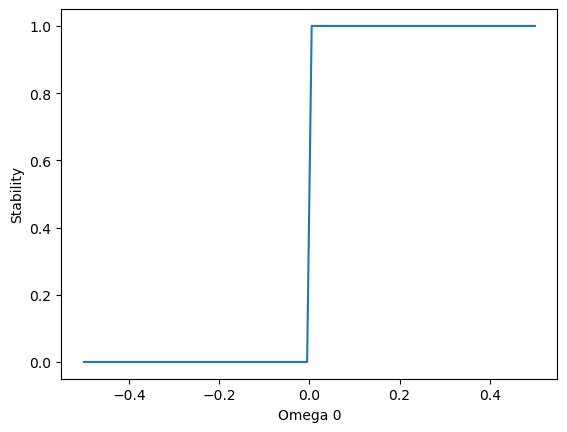

In [18]:
# example stability plot:
camb.set_feedback_level(0)

par = np.linspace(-0.5,0.5,100)
stability_result = []
for ind, par_val in enumerate(par):
    eftcamb_params = {'EFTflag':1,
                      'PureEFTmodel':1,
                      'PureEFTmodelOmega':1,
                      'EFTOmega0':par_val,
                      'feedback_level':0}
    pars = camb.set_params(lmax=2500,
                           As=2.12605e-9,
                           ns=0.96,
                           H0=67.,
                           ombh2=0.022445,
                           omch2=0.12055785610846023,
                           mnu=0.06,
                           tau=0.079,
                           **eftcamb_params)
    # to get just the stability try setting the parameters and intercept:
    try:
        results = camb.get_background(pars)
        stability_result.append(1.)
    except CAMBError:
        stability_result.append(0.)

stability_result = np.array(stability_result)

plt.plot(par, stability_result)
plt.xlabel('Omega 0')
plt.ylabel('Stability')

# Advanced topics: code tree

EFTCAMB has an utility that automatically computes the model tree as follows:

In [19]:
from camb import eftcamb_tree

In [31]:
tree = eftcamb_tree.eftcamb_tree_helper(feedback=0, max_depth=10)

In [37]:
all_keys = []
all_keys = eftcamb_tree.get_all_keys(all_keys, tree)
print(len(all_keys))

3621
